Machine learning Practical question:

Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information from this:
Dataset Description: This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. The data offers various insights but does not align with the official election results. You are encouraged to create your notebooks and delve into the data for further exploration.

In [1]:
# required packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data ingestion.

df=pd.read_csv('election2024.csv')

In [3]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [4]:
df.shape

(1600, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
df.dtypes
# checking the datatypes

id                      object
sex                     object
age                    float64
federal_district        object
type_of_city            object
knows_election_date     object
will_vote               object
candidate               object
television_usage        object
internet_usage          object
education               object
income                  object
employment              object
job_type                object
company_type            object
weight1                float64
dtype: object

In [7]:
df.isnull().sum()
# there are null values im job_type and company_type

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [8]:
df.duplicated().sum()
# no duplicates value

0

In [9]:
df.head()

id   sex   age federal_district  \
0  07169ed8148ce047  male  18.0  north caucasian   
1  0716a4f3354cecdd  male  23.0  north caucasian   
2  0716889b304ce79c  male  20.0            volga   
3  07168e28b5cce563  male  22.0     northwestern   
4  0716a563914ce549  male  21.0         southern   

                                   type_of_city    knows_election_date  \
0                                       village     named correct date   
1                                       village     named correct date   
2         city with population of less than 50k     named correct date   
3  city with population of 1 million and higher  not sure or no answer   
4  city with population of 1 million and higher     named correct date   

        will_vote candidate      television_usage      internet_usage  \
0        not sure     Putin  several times a week  over 4 hours a day   
1        not sure     Putin      once half a year  over 4 hours a day   
2  definitely yes     Putin  several times a week  over 4 hours a day   
3        not sure  Davankov  several times a week  over 4 hours a day   
4  definitely yes     Putin        does not watch  over 4 hours a day   

                     education     income        employment  \
0  incomplete school education  very high      entrepreneur   
1                      college  very high     work for hire   
2                      college  very high     work for hire   
3                      college  very high        unemployed   
4              bachelor degree  very high  employed student   

                  job_type                       company_type   weight1  
0                      NaN                            farming  1.445172  
1  commercial organization                              trade  1.445172  
2   law enforcement agency             law enforcement agency  1.301691  
3                      NaN                                NaN  1.538628  
4  commercial organization  tech, programming, communications  1.967015

In [10]:
df.drop('id', axis=1,inplace=True)
# droping the 'id' column  because its not contrubuting much  

In [11]:
# filling the null values with 'mode' , 'mode' because  its a categorical geatures
# finding the 'mode'.
mode_value = df[df['job_type'].notna()]['job_type'].mode()[0]
mode_value1 = df[df['company_type'].notna()]['company_type'].mode()[0]

In [12]:
df['job_type'] = df['job_type'].fillna(mode_value)
df['company_type'] = df['company_type'].fillna(mode_value)

In [13]:
df.reset_index(drop = True, inplace=True)

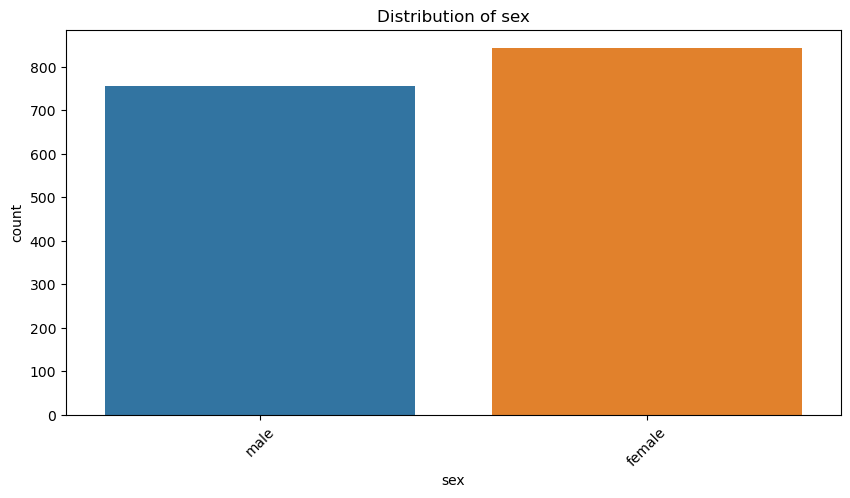

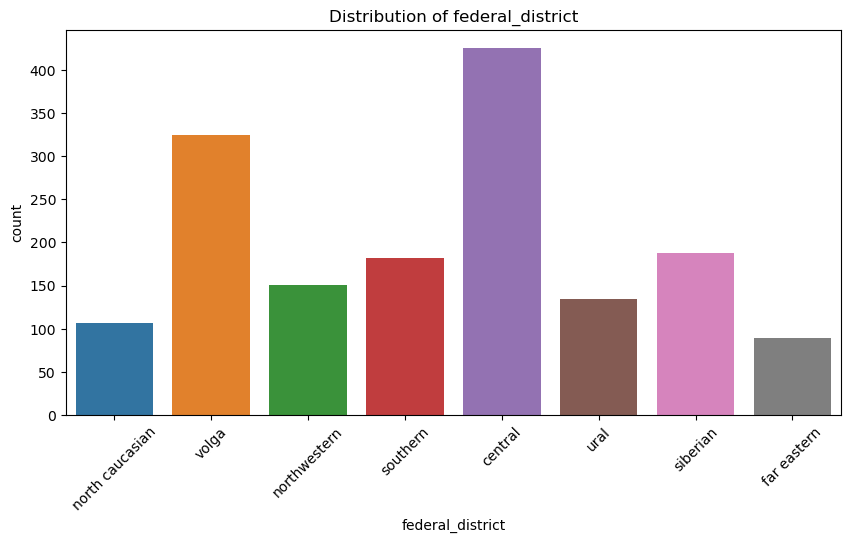

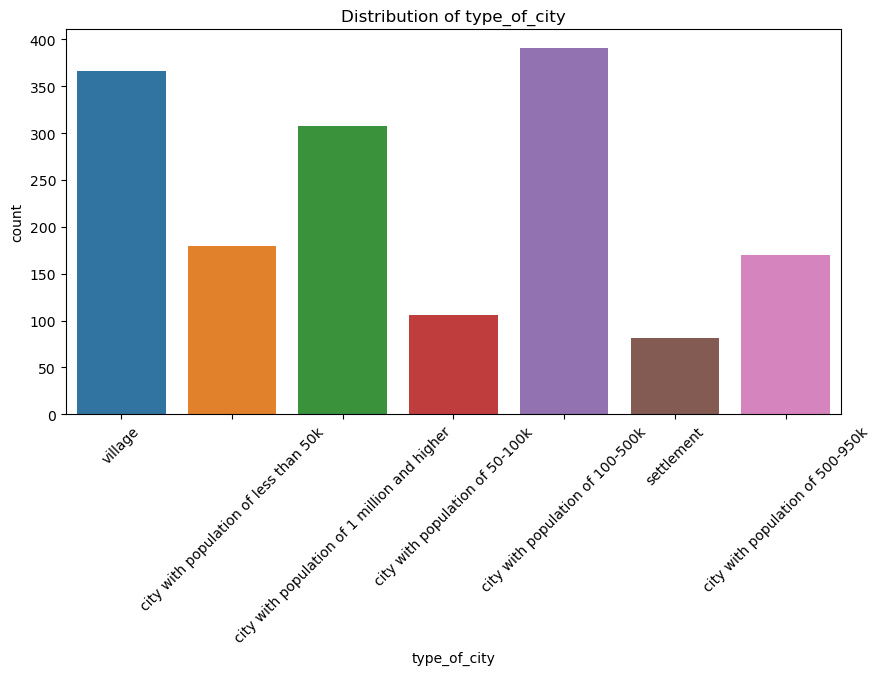

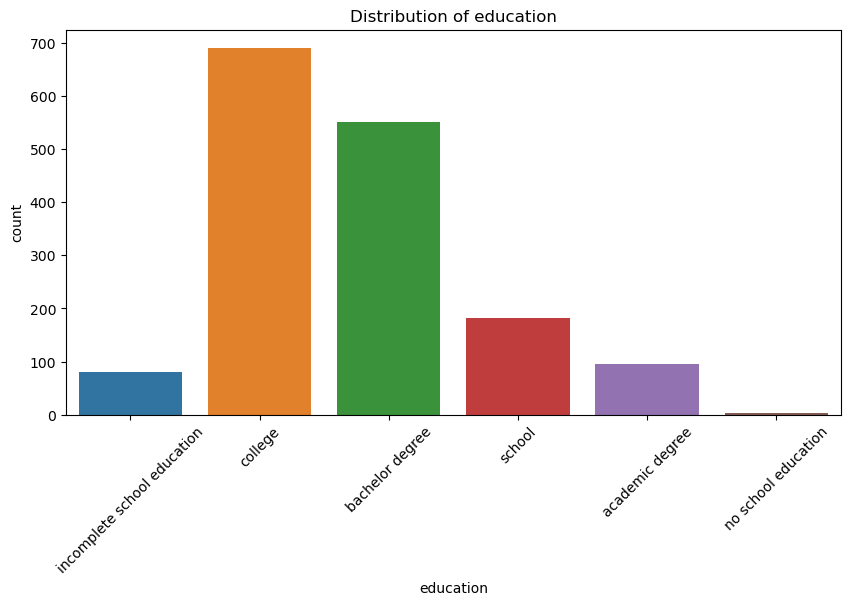

In [14]:
# Plot categorical variables using count plots
categorical_columns = ['sex', 'federal_district', 'type_of_city', 'education']

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()


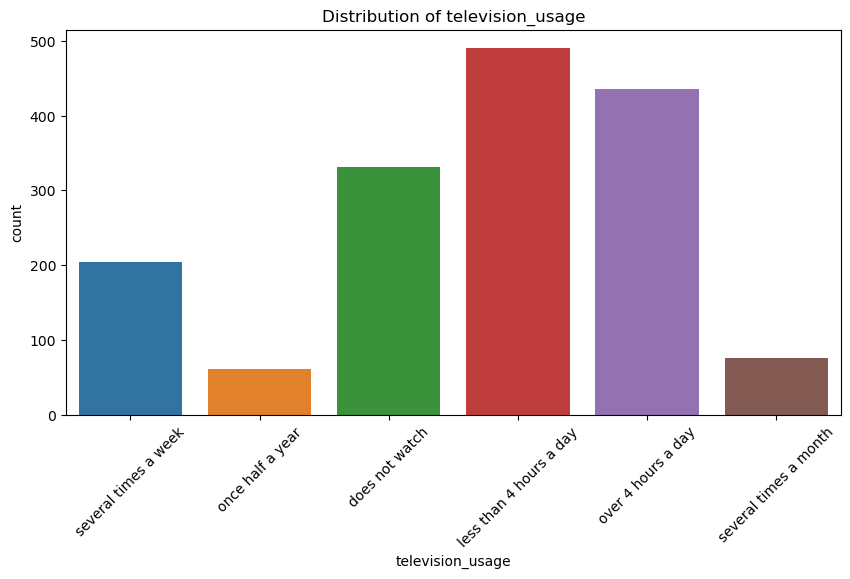

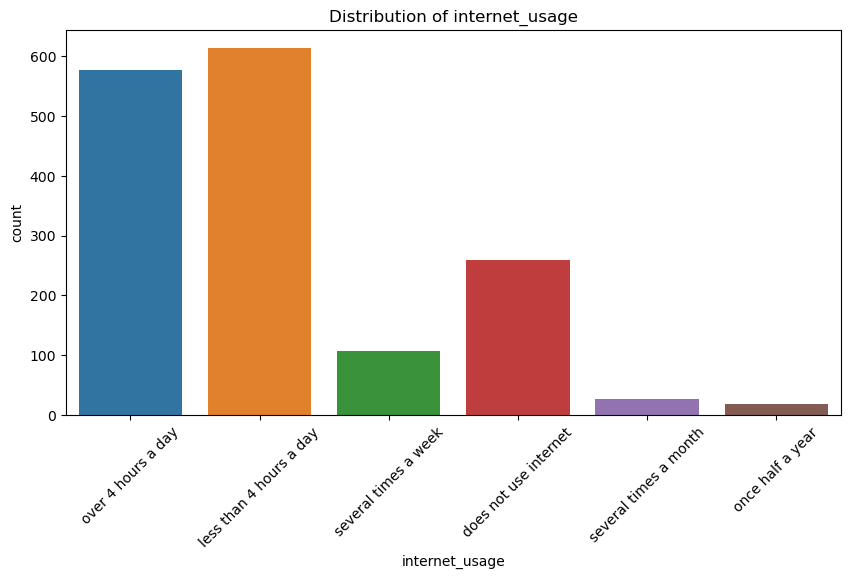

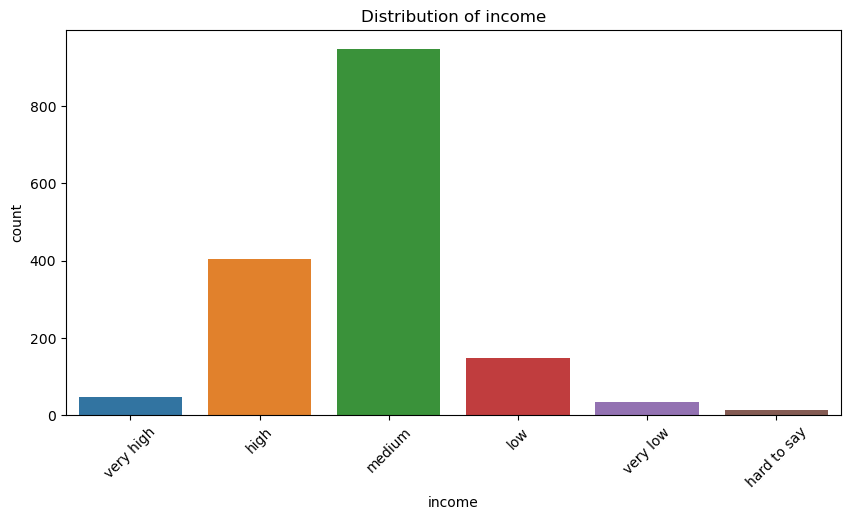

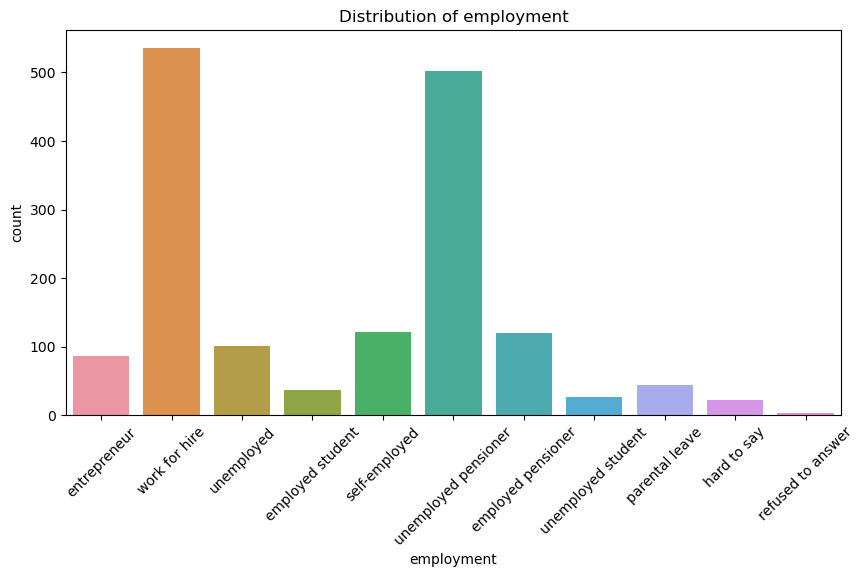

In [15]:
# Univariate Analysis for more categorical variables
additional_categorical_columns = ['television_usage', 'internet_usage', 'income', 'employment']

for column in additional_categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

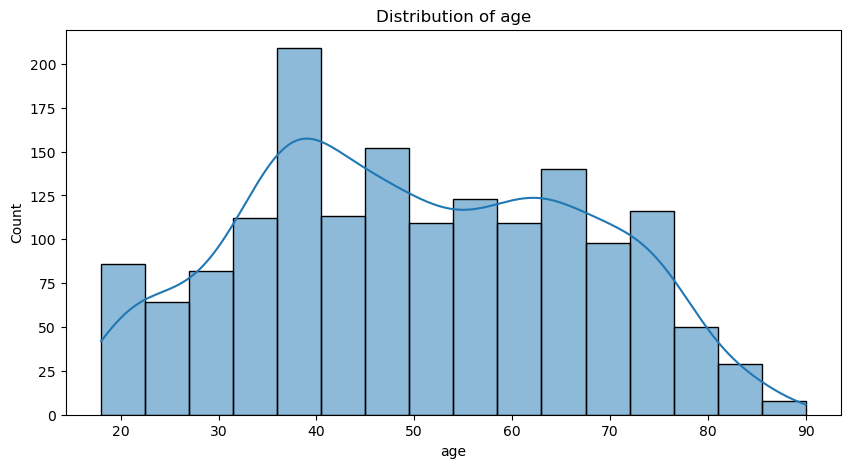

In [16]:
# Plot histograms for numerical variables
numerical_columns = ['age']

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

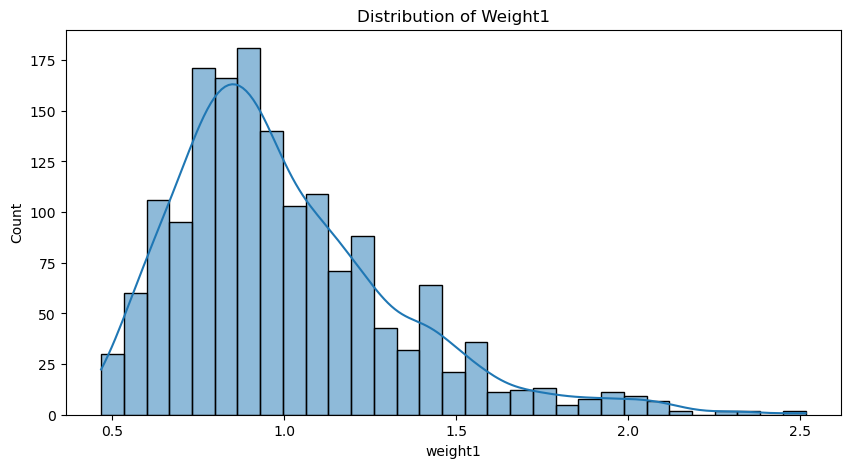

In [17]:
# Univariate analysis for 'weight1'
plt.figure(figsize=(10, 5))
sns.histplot(df['weight1'], kde=True)
plt.title('Distribution of Weight1')
plt.show()

Univariate Analysis  Insights 

Gender Distribution:

The majority of respondents are male (15 out of 20), with fewer females (5 out of 20).
Age Distribution:

Respondents range from 18 to 67 years of age, with more concentration in the younger age group (20-23 years).
Federal District Distribution:

The respondents are spread across various regions, with a noticeable presence from the North Caucasian, Southern, Central, and Northwestern districts.
Type of City:

A significant portion of respondents live in large cities (population 1 million or higher) and mid-sized cities (100-500k).
Villages and smaller towns are less represented.
Education Distribution:

Respondents’ education levels range widely, from incomplete school education to academic degrees, with a notable majority holding college or bachelor’s degrees.
Television Usage:

Many respondents do not watch television at all, while others watch it less frequently (once every half a year).
Those who do watch tend to spend significant time (over 4 hours a day).
Internet Usage:

The majority of respondents spend more than 4 hours a day online, indicating high internet usage among the sample.
Income:

All respondents reported "very high" income levels. This could indicate a bias or misunderstanding in the data.
Employment:

Employment status is varied, with the majority either working for hire or self-employed. A significant number are also unemployed, including pensioners and students.
Weight1 Distribution:

The distribution of the weight1 variable seems relatively uniform, with most values clustered around a specific range (close to 1.0).

Bi_Variate Analysis

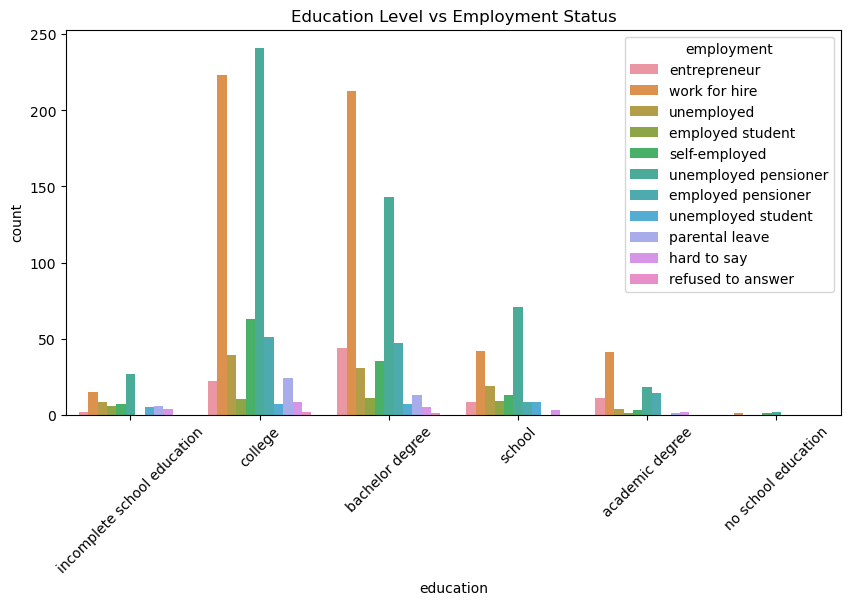

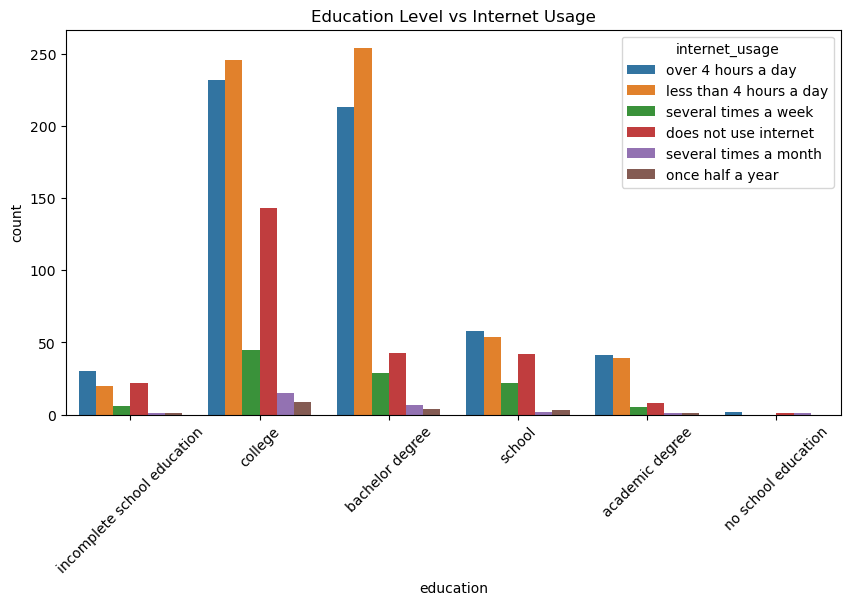

In [19]:
# Bivariate analysis: Education vs Employment
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='employment')
plt.title('Education Level vs Employment Status')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Education vs Internet Usage
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='internet_usage')
plt.title('Education Level vs Internet Usage')
plt.xticks(rotation=45)
plt.show()


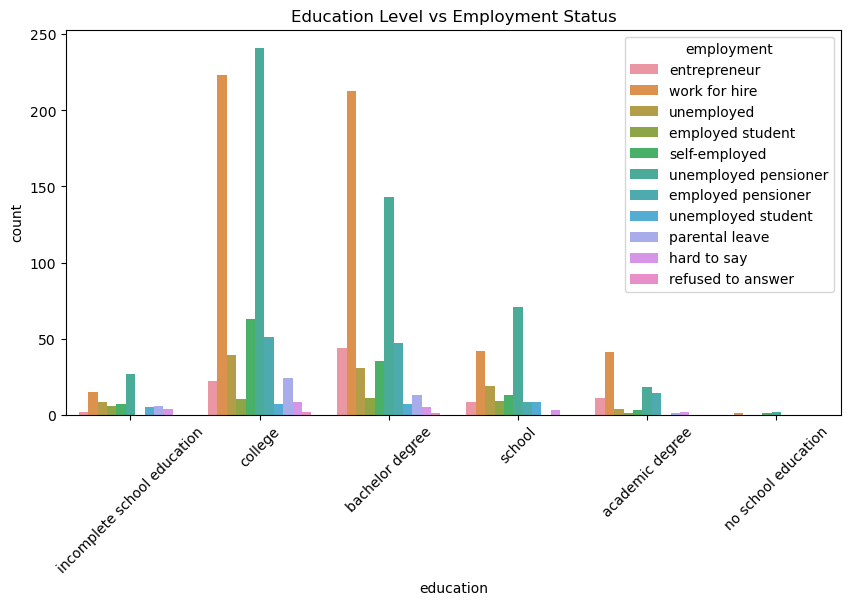

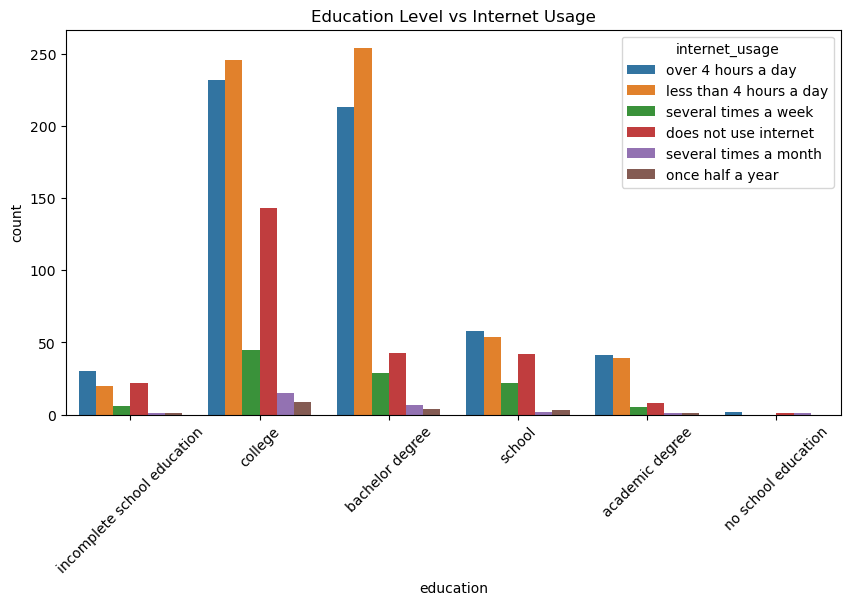

In [20]:
# Bivariate analysis: Education vs Employment
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='employment')
plt.title('Education Level vs Employment Status')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis: Education vs Internet Usage
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='internet_usage')
plt.title('Education Level vs Internet Usage')
plt.xticks(rotation=45)
plt.show()

Bivariate Analysis Insights

Age vs Federal District:

Age distributions vary across different federal districts: Central and Southern regions have a more diverse age distribution. Northwestern regions tend to have younger respondents (in their 20s), while older respondents appear in regions like Ural and Siberia. Age vs Education:

Respondents with incomplete or school education tend to be younger. Those with bachelor’s or academic degrees are spread across the age range, with a noticeable concentration in older age groups (40+ years). Education vs Employment:

Respondents with college or bachelor’s degrees are more likely to be employed or working for hire. Those with lower education levels (school) tend to be unemployed or students. Education vs Internet Usage:

Higher education levels (college and above) correlate with higher internet usage (over 4 hours a day). Respondents with lower education levels are more likely to use the internet less frequently.

Multivariate

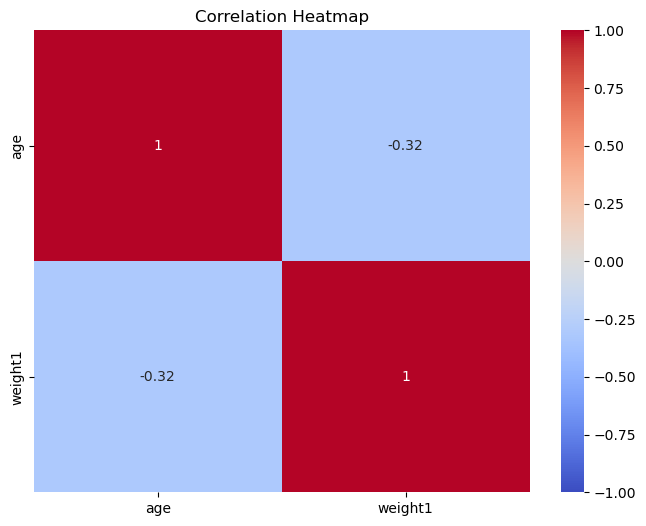

In [22]:
# Heatmap to check correlations between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['age', 'weight1']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

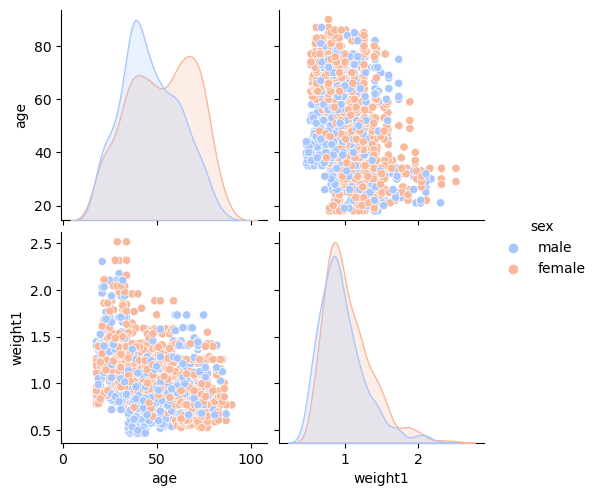

In [23]:
# Pairplot for multivariate relationships between numerical and categorical variables
sns.pairplot(df, hue='sex', vars=['age', 'weight1'], palette='coolwarm')
plt.show()

Multivariate Analysis Insights

Correlation Heatmap:

There is no strong correlation between the age and weight1 variables. These variables appear to be relatively independent of each other. Pairplot:

The pairplot revealed that while both males and females were spread across a wide range of ages, males tended to have slightly higher values for weight1. There is no clear separation between males and females when examining age and weight1. Categorical Heatmap: Federal District vs Education vs Employment:

Central and Southern districts have higher frequencies of respondents with college or bachelor’s degrees working for hire. Villages and smaller regions (like settlements) tend to have fewer respondents with higher education or employment. Northwestern and Volga regions are more diverse in terms of education and employment. Boxplot: Age and Education Across Federal Districts:

Central and Southern districts have respondents across a wide age range, with some concentrations in the 40+ group. Northwestern and Volga regions tend to have younger respondents, primarily in the 20-30 age range. Education levels vary significantly across districts, with higher education (college and bachelor’s) being more common in the central and southern regions, while other regions like North Caucasian tend to have lower education levels.

​